<a href="https://colab.research.google.com/github/Farmhouse121/Financial-Data-Science-in-Python/blob/main/Miscellaneous/Crypto_Degrees_of_Freedom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from my_library import *

In [76]:
data=pd.read_table('https://s3.amazonaws.com/public.gillerinvestments.com/crypto_returns.txt',header=[0, 1],skiprows=[2],sep='\\s+',engine='python',parse_dates=True)
data.columns=data.columns.droplevel(1)
data.index=pd.DatetimeIndex(data.index).to_period('D')
data.index.name='UTC Date'
data.columns.name='Return (%)'
data=data[sorted(data.columns)].copy()
display(data)

Return (%),AAVE-USD,AVAX-USD,BCH-USD,BTC-USD,COMP-USD,DOGE-USD,ETC-USD,ETH-USD,LINK-USD,LTC-USD,SHIB-USD,UNI-USD,XLM-USD,XTZ-USD
UTC Date,,,,,,,,,,,,,,
2024-07-31,2.001567,-2.358840,-4.200110,-2.365537,-0.047707,-2.837462,-2.073961,-1.452662,-2.375695,-2.164731,-6.382353,-3.024153,-1.936113,-2.775783
2024-08-01,8.726297,0.036957,-0.288448,1.151609,1.518046,-2.302137,-0.996922,-0.871557,0.491381,-0.799247,-0.816839,0.230222,-1.248259,-0.608589
2024-08-02,-5.610969,-8.265604,-7.564218,-6.025579,-4.053610,-6.341034,-6.167053,-6.727354,-7.544241,-6.546150,-7.190371,-8.025336,-3.852546,-5.256278
2024-08-03,-4.481945,-3.931834,-4.592054,-1.198185,-13.779336,-3.094934,-2.771871,-2.837828,-1.918234,-0.578258,-2.866894,0.234600,-2.236539,-0.486530
2024-08-04,-7.831497,-6.321154,-8.886479,-4.229510,-7.939911,-4.046256,-3.804583,-7.507444,-6.932854,-3.440406,-6.289529,-7.255568,-5.467211,-3.531816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-28,2.837610,2.163863,3.808639,2.839037,2.569584,11.674972,3.128227,2.424949,1.946306,-0.387379,6.041243,3.336657,0.127429,1.630477
2024-10-29,-0.500148,1.912693,5.421108,3.972433,1.826491,9.262260,2.298063,2.718122,5.275865,4.518136,4.245412,1.794558,2.449889,4.411878
2024-10-30,3.465723,-2.199545,-3.855563,-0.308008,0.235420,-4.152721,0.342633,0.969440,5.239758,-2.733054,-3.258014,2.698092,-1.754658,-2.112728


Return (%),AAVE-USD,AVAX-USD,BCH-USD,BTC-USD,COMP-USD,DOGE-USD,ETC-USD,ETH-USD,LINK-USD,LTC-USD,SHIB-USD,UNI-USD,XLM-USD,XTZ-USD
Return (%),,,,,,,,,,,,,,
AAVE-USD,1.000000,0.559559,0.510428,0.517037,0.692841,0.433346,0.594727,0.563828,0.500777,0.400471,0.468392,0.580933,0.398331,0.580619
AVAX-USD,0.559559,1.000000,0.686520,0.792970,0.775429,0.694013,0.830552,0.809776,0.817481,0.597867,0.759603,0.655480,0.574155,0.886349
BCH-USD,0.510428,0.686520,1.000000,0.839888,0.659935,0.764112,0.846101,0.824186,0.725840,0.649924,0.705341,0.671516,0.634294,0.802898
BTC-USD,0.517037,0.792970,0.839888,1.000000,0.699029,0.798421,0.875721,0.881099,0.844423,0.762847,0.733832,0.703888,0.608057,0.889776
COMP-USD,0.692841,0.775429,0.659935,0.699029,1.000000,0.629843,0.753871,0.748548,0.741503,0.559649,0.620611,0.640620,0.524218,0.745819
DOGE-USD,0.433346,0.694013,0.764112,0.798421,0.629843,1.000000,0.821670,0.763129,0.712470,0.675952,0.793427,0.603961,0.632080,0.808795
ETC-USD,0.594727,0.830552,0.846101,0.875721,0.753871,0.821670,1.000000,0.888847,0.852520,0.721669,0.804780,0.754362,0.685526,0.916483
ETH-USD,0.563828,0.809776,0.824186,0.881099,0.748548,0.763129,0.888847,1.000000,0.859383,0.728981,0.691267,0.733147,0.529835,0.857334
LINK-USD,0.500777,0.817481,0.725840,0.844423,0.741503,0.712470,0.852520,0.859383,1.000000,0.659707,0.661168,0.760853,0.530319,0.854361


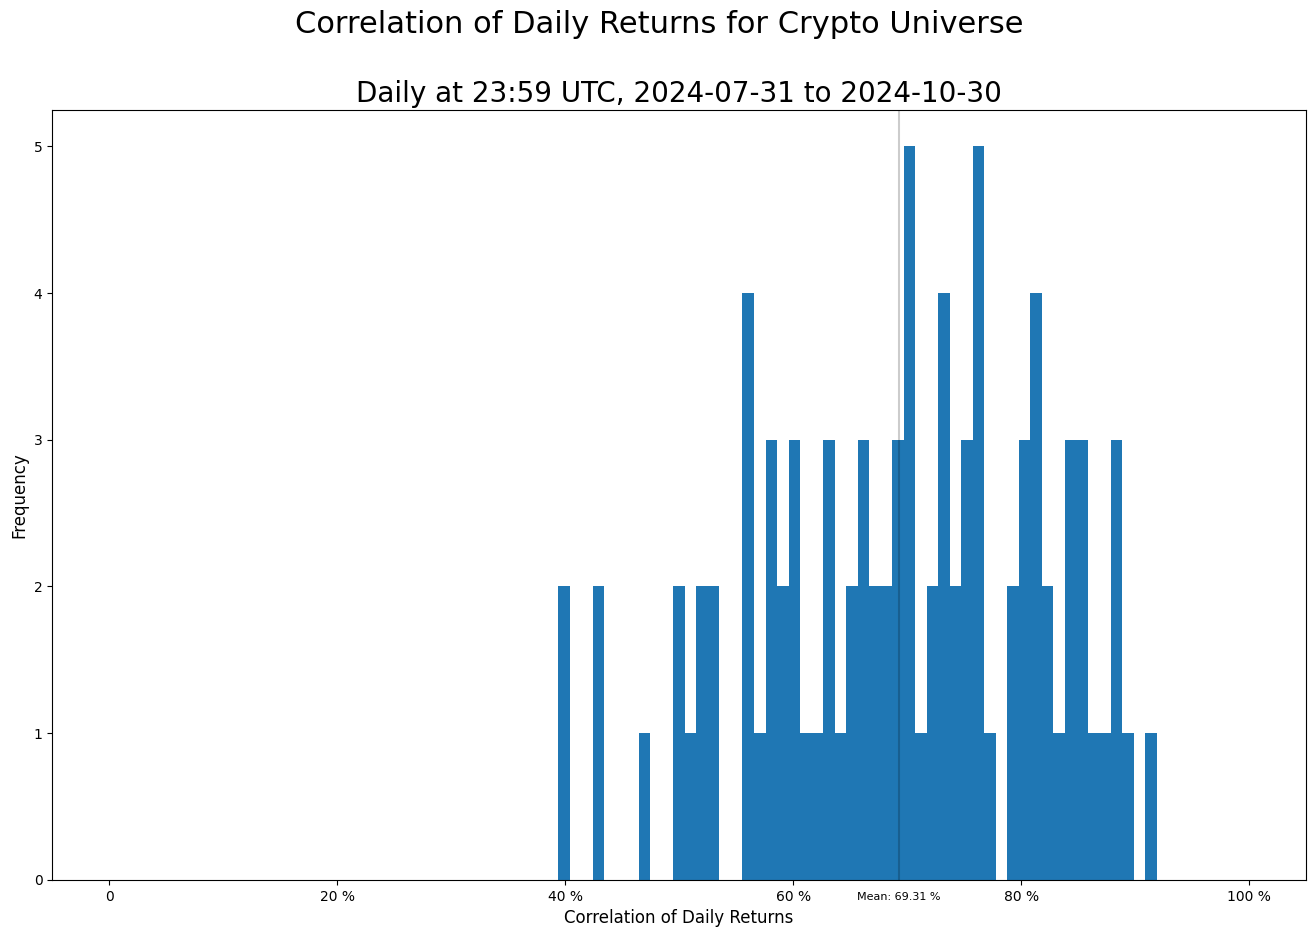

In [113]:
display(rho:=data.corr())
samples=pd.DataFrame({"row":[],"column":[],"correlation":[]}).set_index(["row","column"])

for i in range(rho.shape[0]):
    for j in range(i+1,rho.shape[0]):
        samples.loc[(rho.index[i],rho.columns[j]),"correlation"]=rho.iloc[i,j]*hundred

figure,plot=pl.subplots(figsize=(ten*GoldenRatio,ten))
counts,bins,patches=plot.hist(samples['correlation'],bins=np.linspace(zero,hundred,100))
plot.set_xlabel("Correlation of Daily Returns",fontsize=12)
plot.xaxis.set_major_formatter(PercentLabels(0))
plot.set_ylabel("Frequency",fontsize=12)
plot.yaxis.set_major_formatter(CountLabels(0))
plot.set_title(subtitle:="Daily at 23:59 UTC, %s to %s" % (df.index[0],df.index[-1]),fontsize=20)
plot.axvline(m:=samples['correlation'].mean(),color='black',alpha=0.2)
plot.text(m,zero,"\nMean: {:.2f} %".format(m),ha='center',va='top',fontsize=8)
figure.suptitle(title:="Correlation of Daily Returns for Crypto Universe",fontsize=22)
figure.savefig(title+'.png',dpi=300,bbox_inches='tight')

In [78]:
if 'random_seed' not in locals():
    random_seed=12345678 # don't reset the seed multiple times in one session

if random_seed is not None:
    generator=np.random.default_rng(seed=random_seed)
    nprint("Using NumPy random seed %d." % random_seed)
    random_seed=None

else:
    nprint("Continuing random sequence from prior seed.")

16:16:48 Continuing random sequence from prior seed.


In [81]:
results=pd.DataFrame({"Sample":range(1,(n:=1000)+1),"Assets":[np.nan]*n,"Portfolio":[np.nan]*n,"Stocks":[""]*n}).set_index("Sample") # n is number of trials
nprint("Beginning analysis for {:,d} trials.".format(n))

for i in tqdm(results.index): # for each trial, pick a random sample of stocks with portfolio sizes uniformly distributed between 1 and maximum, one of 2^503-1 choices
    returns=pd.DataFrame()

    for ticker in data[generator.choice(data.columns,generator.integers(1,data.shape[1]+1),replace=False)]:
        returns[ticker]=data[ticker]
        returns=returns.copy() # 'cos it frags, apparently

    results.loc[i,"Coins"]=",".join(map(lambda x:x.split('-')[0],returns.columns)) # list of coins in portfolio
    returns.drop(returns.index[-1],inplace=True) # get rid of final print so all days are full days
    returns['Portfolio']=returns.mean(axis=1) # equal weighted portfolio return
    select=returns["Portfolio"]>zero if filter=="Up" else returns["Portfolio"]<zero if filter=="Down" else ~returns["Portfolio"].isna()
    results.loc[i,"Assets"]=returns.shape[1]-1 # number of assets we ended up with
    results.loc[i,"Independent"]=returns.loc[select,[a for a in returns if a!="Portfolio"]].var().sum()/results.loc[i,"Assets"]**2 # if no correlation, portfolio variance is total variance divided by square of number of assets
    results.loc[i,"Portfolio"]=returns.loc[select,'Portfolio'].var() # variance of portfolio returns for same period as individual returns

results.dropna(inplace=True)
results["Effective D.o.F."]=results["Independent"]/results["Portfolio"]*results["Assets"]
display(results)
nprint("Done.")

16:20:21 Beginning analysis for 1,000 trials.


  0%|          | 0/1000 [00:00<?, ?it/s]

,Assets,Portfolio,Stocks,Coins,Independent,Effective D.o.F.
Sample,,,,,,
1,4.0,12.533883,,"ETH,SHIB,UNI,BCH",4.092289,1.305993
2,7.0,11.132599,,"AVAX,AAVE,LINK,XTZ,BTC,ETH,UNI",2.181740,1.371843
3,4.0,11.412810,,"LINK,UNI,LTC,DOGE",3.882389,1.360713
4,1.0,17.612731,,AVAX,17.612731,1.000000
5,9.0,9.147627,,"AVAX,ETH,LTC,XLM,XTZ,DOGE,ETC,SHIB,BCH",1.377838,1.355602
...,...,...,...,...,...,...
996,3.0,14.734633,,"UNI,SHIB,AAVE",7.030900,1.431505
997,13.0,9.147063,,"ETC,BTC,XLM,XTZ,COMP,UNI,DOGE,ETH,LINK,LTC,AAV...",1.028103,1.461161
998,7.0,8.141317,,"UNI,BTC,LTC,DOGE,XLM,XTZ,ETH",1.636503,1.407085


16:20:31 Done.


In [153]:
from statsmodels.api import OLS,add_constant
Nmin,Nmax=five,results["Assets"].max()-one
design=results[select:=(results["Assets"]>=Nmin)&(results["Assets"]<=Nmax)][[yn:="Effective D.o.F.",xn:="Assets"]].drop_duplicates()
model=OLS(design[yn],add_constant(design[xn])).fit()
nprint(model.summary())
nprint("Implied regression factor count: {:.2f} +/- {:.2g} for data in [{:,.0f},{:,.0f}].".format(Kreg:=one/model.params.iloc[1],model.bse.iloc[1]/model.params.iloc[1]**4,Nmin,Nmax))
final=results[results[xn]==results[xn].max()].drop_duplicates(xn)
Nstar,Nact=tuple(final.iloc[-1][[yn,xn]])
rho=(Nact-Nstar)/((Nact-one)*Nstar)
nprint("Effective D.o.F. Limit {:,.2f}, Implied Correlation {:.2f} %.".format(Nstar,rho*hundred))
Khat=Nact/Nstar
nprint("Implied limiting factor count: {:.0f}.".format(Khat))

17:49:36                             OLS Regression Results                            
Dep. Variable:       Effective D.o.F.   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.127
Method:                 Least Squares   F-statistic:                     84.70
Date:                Fri, 01 Nov 2024   Prob (F-statistic):           6.38e-19
Time:                        17:49:36   Log-Likelihood:                 707.43
No. Observations:                 577   AIC:                            -1411.
Df Residuals:                     575   BIC:                            -1402.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3349      0.011    120.555

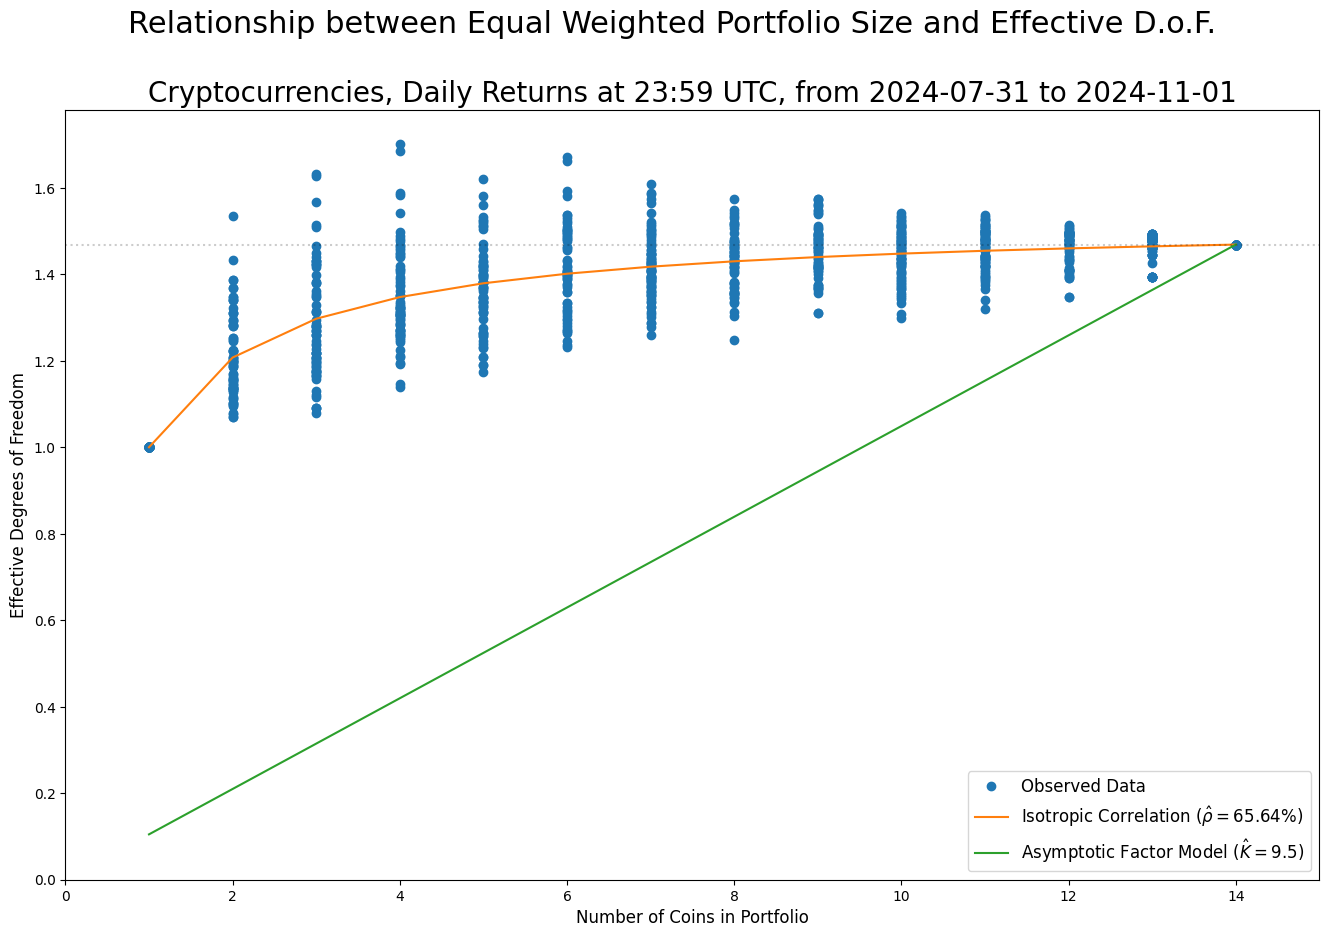

In [160]:
figure,plot=pl.subplots(figsize=(ten*GoldenRatio,ten))
plot.plot(x:=results["Assets"].to_numpy(),y:=results["Effective D.o.F."].to_numpy(),'o',label='Observed Data')
plot.plot(xp:=np.unique(np.sort(x)),xp/(one+(xp-one)*rho),'-',label='Isotropic Correlation ($\\hat{\\rho} = %.2f$%%)' % (rho*hundred))
plot.plot(xp,xp/Khat,'-',label="Asymptotic Factor Model ($\\hat{K} = %.1f$)" % Khat)
#plot.plot(xpp:=np.arange(Nmin,Nmax+one),model.params.iloc[0]+model.params.iloc[1]*xpp,'-',label="Regression Linear Model ($\\hat{K} = %.1f$)" % Kreg)
plot.set_xscale('log' if max(x)>100 else 'linear')
plot.set_ylim(zero,None)
plot.set_xlabel("Number of Coins in Portfolio",fontsize=12)
plot.set_ylabel("Effective Degrees of Freedom",fontsize=12)
figure.suptitle(title:="Relationship between Equal Weighted Portfolio Size and Effective D.o.F.",fontsize=22)
plot.set_title(subtitle:="Cryptocurrencies, Daily Returns at 23:59 UTC, from %s to %s" % (data.index[0],data.index[-1]),fontsize=20)
plot.set_xlim(zero,Nmax+two)
plot.legend(fontsize=12)
plot.axhline(Nstar,color='black',linestyle=':',alpha=0.2)
plot.xaxis.set_major_formatter(CountLabels())
figure.savefig(title+".png",dpi=300,bbox_inches='tight')

,Mean,St.Dev.,Sample,Std.Err.,Model,Error,Z Score,Chi Sq.
Assets,,,,,,,,
1.0,1.000000,0.000000,73,0.000000,1.000000,0.000000,NaN,NaN
2.0,1.213082,0.097662,74,0.011353,1.207445,0.005637,0.496514,0.246526
3.0,1.282959,0.126924,74,0.014755,1.297140,-0.014181,-0.961126,0.923762
4.0,1.348608,0.112030,73,0.013112,1.347177,0.001430,0.109085,0.011899
5.0,1.368908,0.100141,68,0.012144,1.379097,-0.010188,-0.838983,0.703892
6.0,1.413536,0.102327,64,0.012791,1.401230,0.012306,0.962102,0.925639
7.0,1.417810,0.075098,80,0.008396,1.417480,0.000330,0.039313,0.001545
8.0,1.429336,0.066668,63,0.008399,1.429916,-0.000581,-0.069135,0.004780
9.0,1.454906,0.064052,64,0.008006,1.439741,0.015165,1.894067,3.587489


17:51:58 Total Chi Squared 7.65124 for 13 d.o.f., p Value = 0.865556.


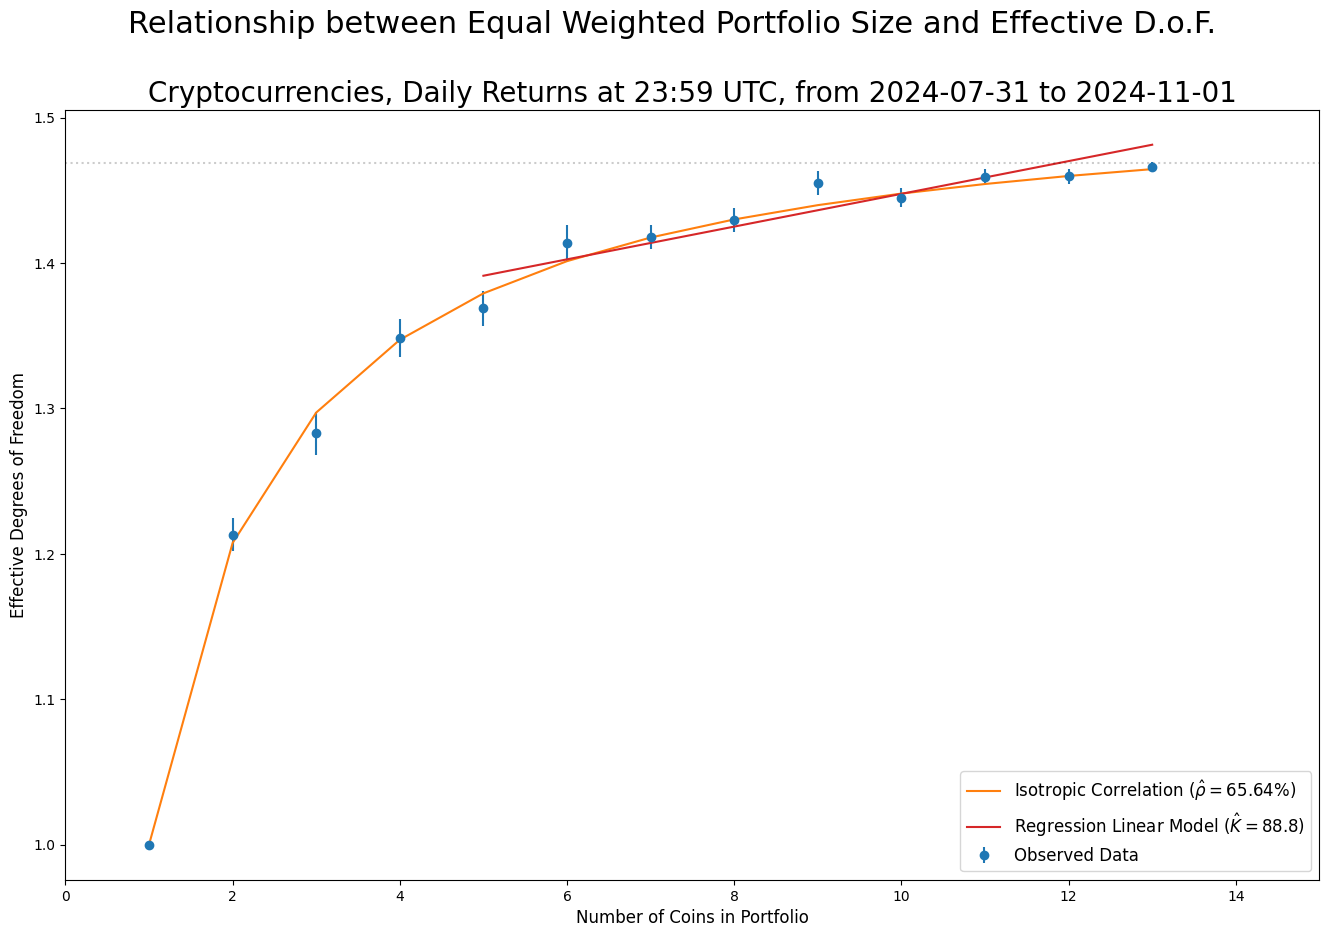

In [161]:
from scipy.stats import chi2
meta=pd.DataFrame()
meta["Mean"]=(g:=results[results["Assets"]<=Nmax][["Assets","Effective D.o.F."]].groupby("Assets")).mean()
meta["St.Dev."]=g.std()
meta["Sample"]=g.count()
meta["Std.Err."]=meta["St.Dev."]/meta["Sample"]**0.5
meta["Model"]=(x:=meta.index)/(one+(x-one)*rho)
meta["Error"]=meta["Mean"]-meta["Model"]
meta["Z Score"]=meta["Error"]/meta["Std.Err."]
meta["Chi Sq."]=meta["Z Score"]**2
display(meta)
nprint("Total Chi Squared %g for %d d.o.f., p Value = %g." % (meta["Chi Sq."].sum(),meta.shape[0],chi2(meta.shape[0]).sf(meta["Chi Sq."].sum())))

figure,plot=pl.subplots(figsize=(ten*GoldenRatio,ten))
plot.errorbar(x=meta.index,y=meta["Mean"],yerr=meta["Std.Err."],fmt='o',label='Observed Data')
plot.plot(x,z:=meta["Model"],'-',label='Isotropic Correlation ($\\hat{\\rho} = %.2f$%%)' % (rho*hundred),color='C1')
plot.plot(xp:=np.arange(Nmin,Nmax+one),model.params.iloc[0]+model.params.iloc[1]*xp,'-',label="Regression Linear Model ($\\hat{K} = %.1f$)" % Kreg,color='C3')
plot.set_xscale('log' if max(x)>100 else 'linear')
plot.set_xlabel("Number of Coins in Portfolio",fontsize=12)
plot.set_ylabel("Effective Degrees of Freedom",fontsize=12)
figure.suptitle(title,fontsize=22)
plot.set_title(subtitle,fontsize=20)
plot.set_xlim(zero,Nmax+two)
plot.legend(fontsize=12)
plot.axhline(Nstar,color='black',linestyle=':',alpha=0.2)
plot.xaxis.set_major_formatter(CountLabels())
figure.savefig(title+" 2.png",dpi=300,bbox_inches='tight')

In [162]:
Nstar

1.4685712597573322

In [139]:
(1895-3898)/(628**2+1278**2)**0.5

-1.4066385831052879

In [140]:
(1895+3898)/2

2896.5